<a href="https://colab.research.google.com/github/saniya1027108/EY_Techathon/blob/main/Market_Basket(Grocery).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sharmaroshan/Market-Basket-Analysis.git

Cloning into 'Market-Basket-Analysis'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Receiving objects: 100% (30/30), 214.03 KiB | 7.64 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Using Apriori Algorithm**

In [3]:
# installing apyori package

!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=95dc1f4abdaaeca2ebaa80eab501d03d5e2c5e714795d197a810049bed79d1c7
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [4]:
import numpy as np
import pandas as pd

from apyori import apriori

**Importing the dataset**

In [5]:
# reading the dataset

df = pd.read_csv('/content/Market-Basket-Analysis/Market_Basket_Optimisation.csv', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.shape)

(7501, 20)


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


**Data Preprocessing**

In [8]:

# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
  trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

# having a look at the top 10 customer's items list
print(trans[1:10])

(7501, 20)
[['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['whole wheat pasta' 'french fries' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['soup' 'light cream' 'shallot' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['fro

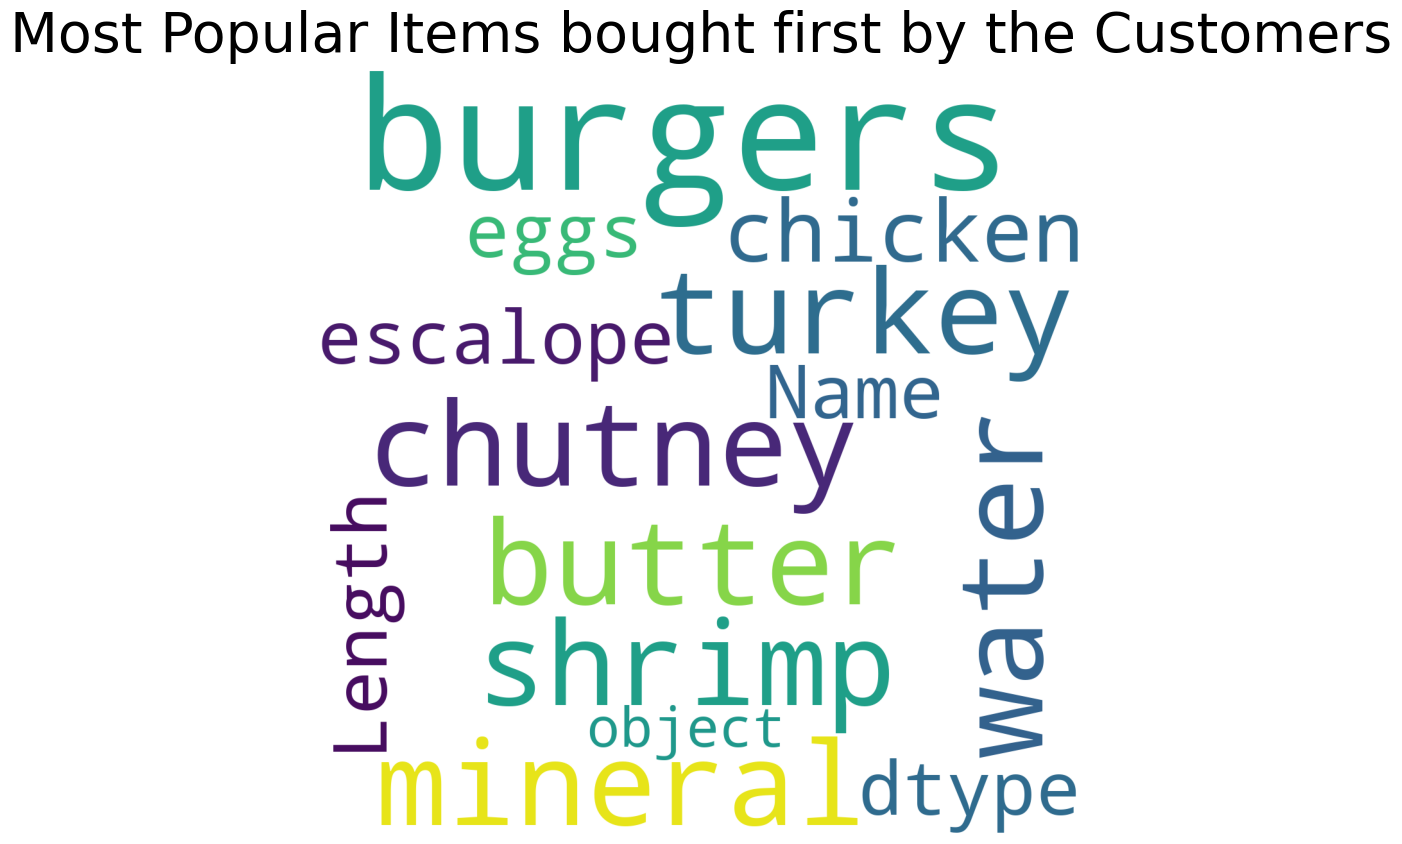

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()

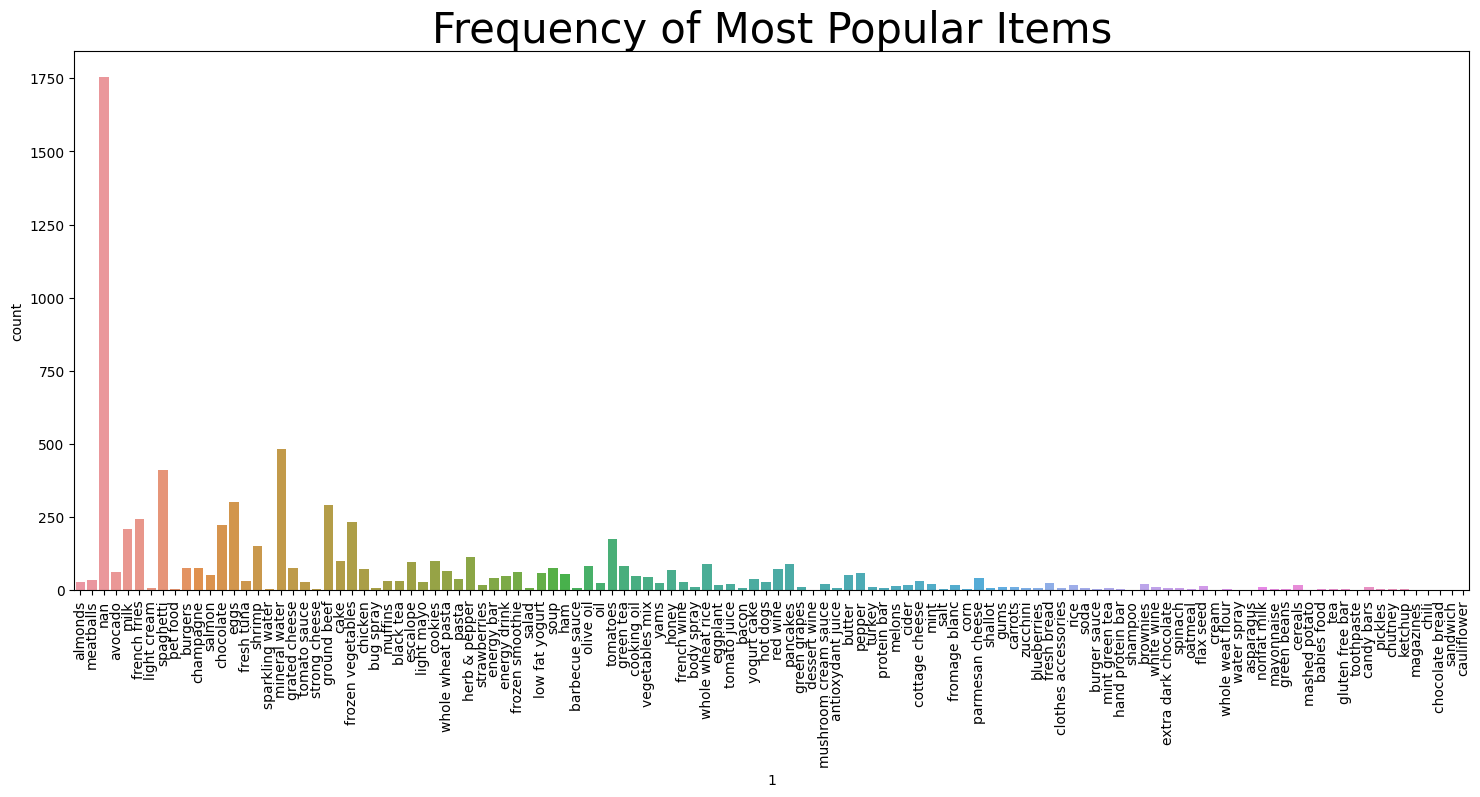

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df[1]' contains the item names or categories
# Convert the column to strings (in case it's not already)
df[1] = df[1].astype(str)

plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(data=df, x=1)
plt.title('Frequency of Most Popular Items', fontsize=30)
plt.xticks(rotation=90)
plt.show()


**Training of the dataset**

In [13]:
# applying apriori rules to our dataset

trans = list(trans)
rules = apriori(trans, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)


**Visualising the results**

In [14]:
results = list(rules)
results[0]

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

In [20]:
# Create a DataFrame
df = pd.DataFrame(results, columns=['frequent items', 'support', 'confidence'])

# Display the DataFrame
df.head(10)

,frequent items,support,confidence
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
5,"(ground beef, tomato sauce)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
6,"(olive oil, light cream)",0.003200,"[((light cream), (olive oil), 0.20512820512820..."
7,"(olive oil, whole wheat pasta)",0.007999,"[((whole wheat pasta), (olive oil), 0.27149321..."
8,"(shrimp, pasta)",0.005066,"[((pasta), (shrimp), 0.3220338983050847, 4.506..."
9,"(milk, avocado, spaghetti)",0.003333,"[((avocado, spaghetti), (milk), 0.416666666666..."
